## Keşifçi Veri Analizi | Becerileri Pekiştirme

![](https://s3.amazonaws.com/assets.datacamp.com/blog_assets/Machine+Learning+R/iris-machinelearning.png)

Aşağıda ihtiyacımız doğrultusunda kullanacağımız kütüphaneleri yükleyelim.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
import plotly.express as px

Veri çerçevemizi bulunduğumuz dizinden yükleyelim ve bir veri çerçevesi haline getirerek df değişkenine atayalım. (pd.read_csv(...csv))

In [2]:
df = pd.read_csv("../input/irisdataset/iris.csv")

Veri çerçevesinin ilk 5 gözlemini görüntüleyelim.

In [3]:
df.head(5)

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


Veri çerçevesinde son 4 eleman görüntüleyelim.

In [4]:
df.tail(8)

,sepal.length,sepal.width,petal.length,petal.width,variety
142,5.8,2.7,5.1,1.9,Virginica
143,6.8,3.2,5.9,2.3,Virginica
144,6.7,3.3,5.7,2.5,Virginica
145,6.7,3.0,5.2,2.3,Virginica
146,6.3,2.5,5.0,1.9,Virginica
147,6.5,3.0,5.2,2.0,Virginica
148,6.2,3.4,5.4,2.3,Virginica
149,5.9,3.0,5.1,1.8,Virginica


Veri çerçevesinin kaç öznitelik ve kaç gözlemden oluştuğunu görüntüleyelim.

In [5]:
df.shape

(150, 5)

Veri çerçevesindeki değişkenlerin hangi tipte olduğunu ve bellek kullanımını görüntüleyelim.

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal.length  150 non-null    float64
 1   sepal.width   150 non-null    float64
 2   petal.length  150 non-null    float64
 3   petal.width   150 non-null    float64
 4   variety       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


Veri çerçevesindeki sayısal değişkenler için temel istatistik değerlerini görüntüleyelim.

Standart sapma ve ortalama değerlerden çıkarımda bulunarak hangi değişkenlerin ne kadar varyansa sahip olduğu hakkında fikir yürütelim.

In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
sepal.length,150.0,5.843333,0.828066,4.3,5.1,5.80,6.4,7.9
sepal.width,150.0,3.057333,0.435866,2.0,2.8,3.00,3.3,4.4
petal.length,150.0,3.758000,1.765298,1.0,1.6,4.35,5.1,6.9
petal.width,150.0,1.199333,0.762238,0.1,0.3,1.30,1.8,2.5


Standart sapması en büyük olan değişkenin varyansı en büyük olacaktır. Tablomuzu incelediğimizde en büyük standart sapmanın Petal Length ve en küçük standart sapmanın Sepal widhth de olamsı beklenir.

Veri çerçevesinde hangi öznitelikte kaç adet eksik değer olduğunu gözlemleyelim.

In [8]:
df.isna().sum()

sepal.length    0
sepal.width     0
petal.length    0
petal.width     0
variety         0
dtype: int64

Sayısal değişkenler arasında korelasyon olup olmadığını göstermek için korelasyon matrisi çizdirelim. Korelasyon katsayıları hakkında fikir yürütelim.

En güçlü pozitif ilişki hangi iki değişken arasındadır?

In [9]:
df.corr()


,sepal.length,sepal.width,petal.length,petal.width
sepal.length,1.000000,-0.117570,0.871754,0.817941
sepal.width,-0.117570,1.000000,-0.428440,-0.366126
petal.length,0.871754,-0.428440,1.000000,0.962865
petal.width,0.817941,-0.366126,0.962865,1.000000


En güçlü ilişki petal length ve petal width arasındadır.

Korelasyon katsayılarını daha iyi okuyabilmek için ısı haritası çizdirelim.

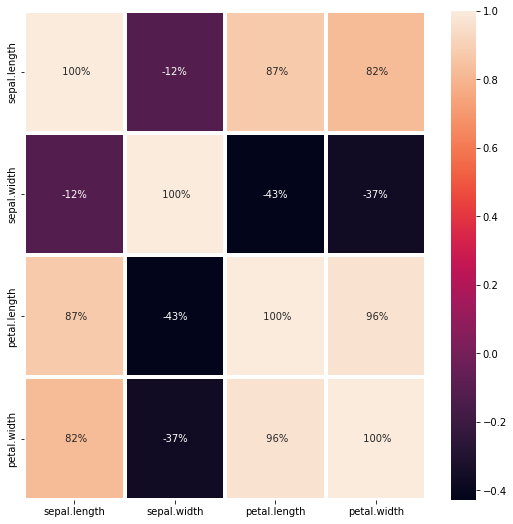

In [10]:
corr = df.corr()
f,ax = plt.subplots(figsize=(9,9))
sns.heatmap(corr,annot=True,linewidths=4, fmt= ' .0%', ax=ax)
plt.show()

Veri çerçevemizin hedef değişkeninin "variety" benzersiz değerlerini görüntüleyelim.

In [11]:
df["variety"].unique()

array(['Setosa', 'Versicolor', 'Virginica'], dtype=object)

Veri çerçevemizin hedef değişkeninin "variety" benzersiz kaç adet değer içerdiğini görüntüleyelim.

In [12]:
df["variety"].nunique()

3

Veri çerçevesindeki sepal.width ve sepal.length değişkenlerinin sürekli olduğunu görüyoruz. Bu iki sürekli veriyi görselleştirmek için önce scatterplot kullanalım.

Text(0.5, 1.0, 'Scatter Plot')

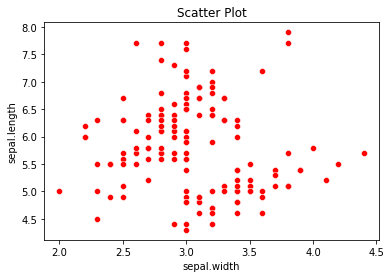

In [13]:
sns.scatterplot(x="sepal.width", y="sepal.length", color="red", data=df)
plt.title("Scatter Plot")

Aynı iki veriyi daha farklı bir açıdan frekanslarıyla incelemek için jointplot kullanarak görselleştirelim. 

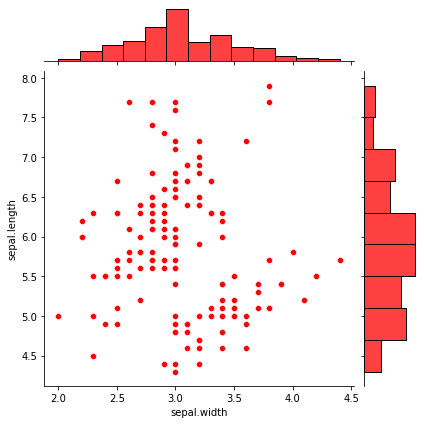

In [14]:
sns.jointplot(x= df["sepal.width"], y=df["sepal.length"], color = "red");

Aynı iki veriyi scatterplot ile tekrardan görselleştirelim fakat bu sefer "variety" parametresi ile hedef değişkenine göre kırdıralım. 

3 farklı renk arasında sepal değişkenleriyle bir kümeleme yapılabilir mi? Ne kadar ayırt edilebilir bunun üzerine düşünelim.

Text(0.5, 1.0, 'Scatter Plot')

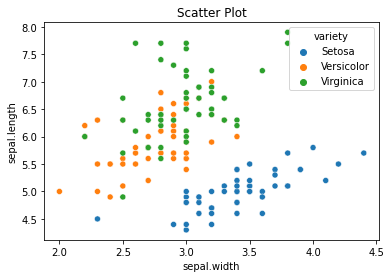

In [15]:
sns.scatterplot(x="sepal.width", y="sepal.length", hue="variety",data=df)
plt.title("Scatter Plot")

Setosa türü, versicolor ve virginica türlerinden ayırt edilebilirken. Versicolor ve virginicayı ayırt etmekte zorlanrız.

value_counts() fonksiyonu ile veri çerçevemizin ne kadar dengeli dağıldığını sorgulayalım. 

In [16]:
df["variety"].value_counts()

Setosa        50
Versicolor    50
Virginica     50
Name: variety, dtype: int64

Keman grafiği çizdirerek sepal.width değişkeninin dağılımını inceleyin. 

Söz konusu dağılım bizim için ne ifade ediyor, normal bir dağılım olduğunu söyleyebilir miyiz?

<AxesSubplot:ylabel='sepal.width'>

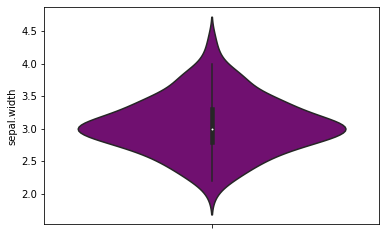

In [17]:
sns.violinplot(y= "sepal.width", data=df, color='purple')

Daha iyi anlayabilmek için sepal.width üzerine bir distplot çizdirelim.

<AxesSubplot:xlabel='sepal.width', ylabel='Density'>

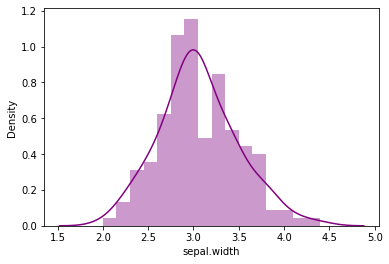

In [18]:
sns.distplot(df["sepal.width"],bins=16, color = "purple")

Üç çiçek türü için üç farklı keman grafiğini sepal.length değişkeninin dağılımı üzerine tek bir satır ile görselleştirelim.

<AxesSubplot:xlabel='variety', ylabel='sepal.length'>

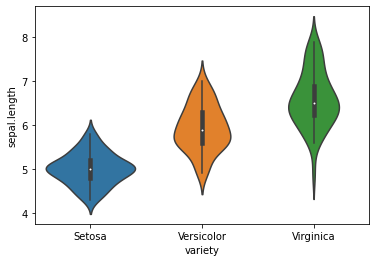

In [19]:
sns.violinplot(x = "variety", y= "sepal.length", data= df)

Hangi çiçek türünden kaçar adet gözlem barındırıyor veri çerçevemiz?

50 x 3 olduğunu ve dengeli olduğunu value_counts ile zaten görmüştük, ancak bunu görsel olarak ifade etmek için sns.countplot() fonksiyonuna variety parametresini vereilm.

<AxesSubplot:xlabel='variety', ylabel='count'>

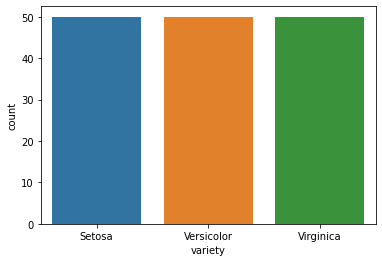

In [20]:

sns.countplot(x="variety", data=df)


sepal.length ve sepal.width değişkenlerini sns.jointplot ile görselleştirelim, dağılımı ve dağılımın frekansı yüksek olduğu bölgelerini inceleyelim.

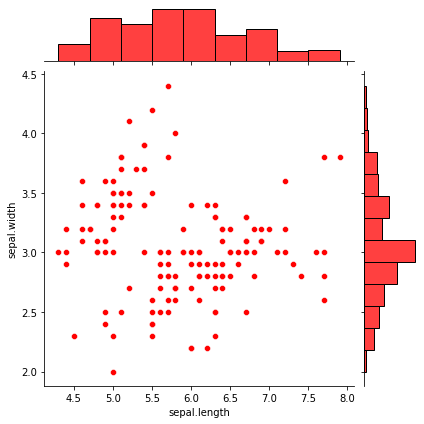

In [21]:
sns.jointplot(x=df['sepal.length'],y=df['sepal.width'],color = 'red');

Bir önceki hücrede yapmış olduğumuz görselleştirmeye kind = "kde" parametresini ekleyelim. Böylelikle dağılımın noktalı gösterimden çıkıp yoğunluk odaklı bir görselleştirmeye dönüştüğünü görmüş olacağız.

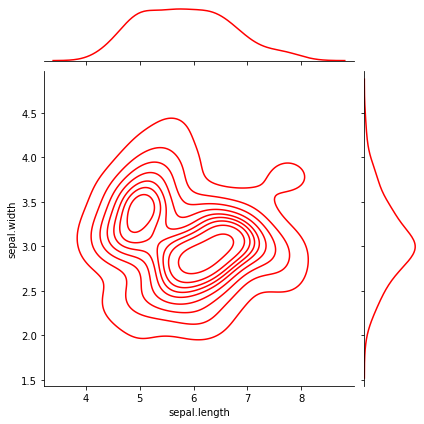

In [22]:
sns.jointplot(x = df['sepal.length'], y = df['sepal.width'], kind = "kde", color  = "red")

scatterplot ile petal.length ve petal.width değişkenlerinin dağılımlarını çizdirelim.

<AxesSubplot:xlabel='petal.length', ylabel='petal.width'>

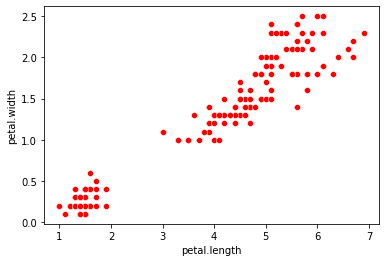

In [23]:
sns.scatterplot(x="petal.length", y="petal.width", data=df, color = 'red')

Aynı görselleştirmeye hue = "variety" parametresini ekleyerek 3. bir boyut verelim.

<AxesSubplot:xlabel='petal.length', ylabel='petal.width'>

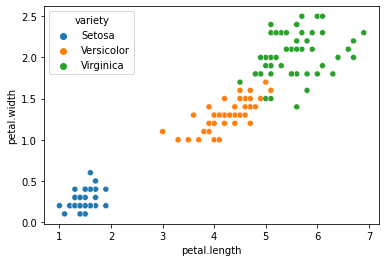

In [24]:
sns.scatterplot(x="petal.length", y="petal.width", hue="variety", data=df)

sns.lmplot() görselleştirmesini petal.length ve petal.width değişkenleriyle implemente edelim. Petal length ile petal width arasında ne tür bir ilişki var ve bu ilişki güçlü müdür? sorusunu yanıtlayalım.

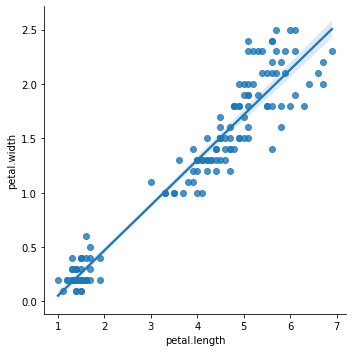

In [25]:
sns.lmplot(x = "petal.length", y="petal.width", data=df)

Petal length ve petal width arasında güçlü bir ilişki vardır, korelasyon katsayıları yüksektir.

Bu sorunun yanıtını pekiştirmek için iki değişken arasında korelasyon katsayısını yazdıralım. 

In [26]:
df.corr()["petal.length"]["petal.width"]

0.962865431402796

Petal Length ile Sepal Length değerlerini toplayarak yeni bir total length özniteliği oluşturalım.

In [27]:
df['total.length'] = df['petal.length'] + df['sepal.length']

total.length'in ortalama değerini yazdıralım. 

In [28]:
df['total.length'].mean()

9.601333333333338

total.length'in standart sapma değerini yazdıralım.

In [29]:
df['total.length'].std()

2.5200401260964997

sepal.length'in maksimum değerini yazdıralım.

In [30]:
max(df['sepal.length'])

7.9

sepal.length'i 5.5'den büyük ve türü setosa olan gözlemleri yazdıralım.

In [31]:
df[(df['sepal.length']>5.5) & (df['variety'] == 'Setosa')]

,sepal.length,sepal.width,petal.length,petal.width,variety,total.length
14,5.8,4.0,1.2,0.2,Setosa,7.0
15,5.7,4.4,1.5,0.4,Setosa,7.2
18,5.7,3.8,1.7,0.3,Setosa,7.4


petal.length'i 5'den küçük ve türü virginica olan gözlemlerin sadece sepal.length ve sepal.width değişkenlerini ve değerlerini yazdıralım.

In [32]:
df[(df['petal.length']<5) & (df['variety'] == 'Virginica')][['sepal.length','sepal.width']]

,sepal.length,sepal.width
106,4.9,2.5
121,5.6,2.8
123,6.3,2.7
126,6.2,2.8
127,6.1,3.0
138,6.0,3.0


Hedef değişkenimiz variety'e göre bir gruplama işlemi yapalım değişken değerlerimizin ortalamasını görüntüleyelim.

In [33]:
df.groupby('variety').mean()

,sepal.length,sepal.width,petal.length,petal.width,total.length
variety,,,,,
Setosa,5.006,3.428,1.462,0.246,6.468
Versicolor,5.936,2.770,4.260,1.326,10.196
Virginica,6.588,2.974,5.552,2.026,12.140


Hedef değişkenimiz variety'e göre gruplama işlemi yaparak sadece petal.length değişkenimizin standart sapma değerlerini yazdıralım. 

In [34]:
df.groupby('variety')['petal.length'].mean()

variety
Setosa        1.462
Versicolor    4.260
Virginica     5.552
Name: petal.length, dtype: float64

İki değişkenli analiz yapalım.

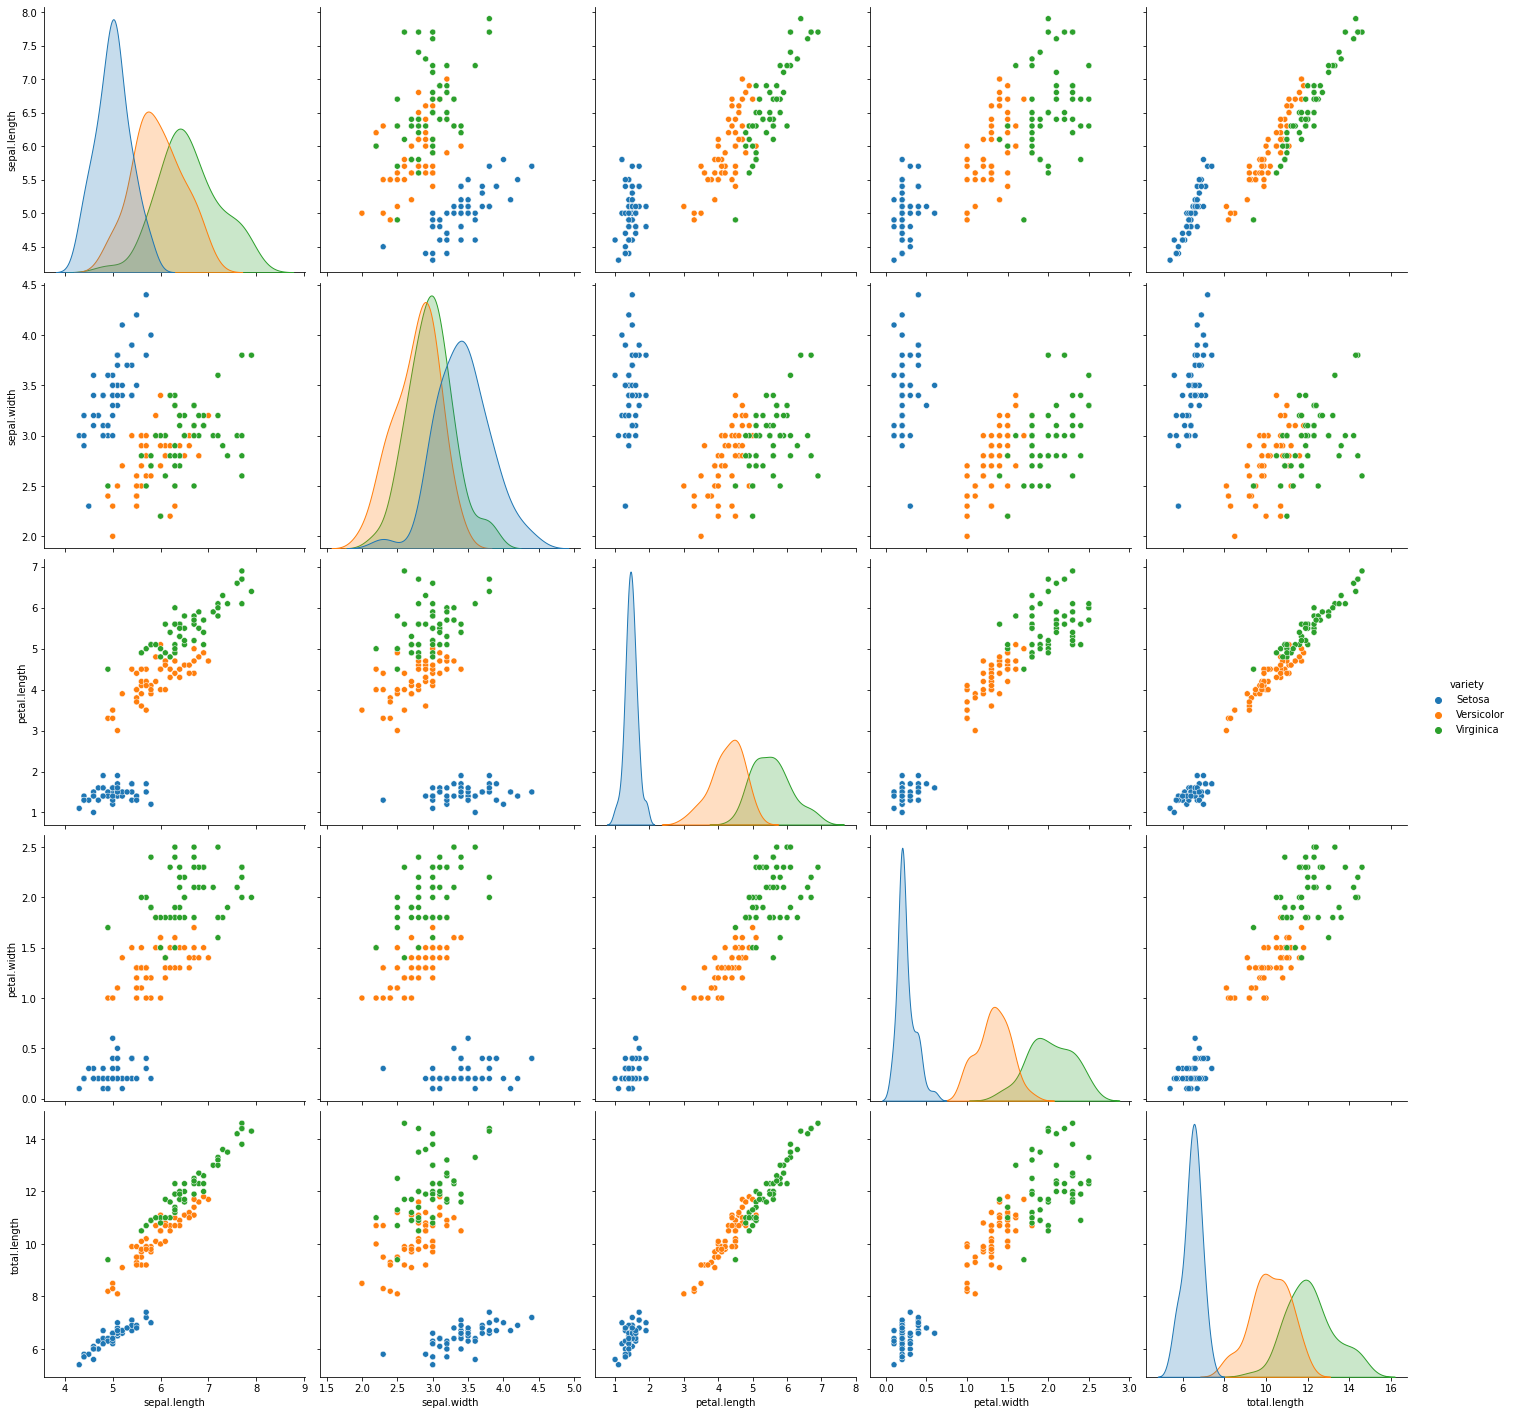

In [35]:
sns.pairplot(df,hue='variety',height=4)

Histogram grafiği ve olasılık yoğunluk fonksiyonunu çizelim.

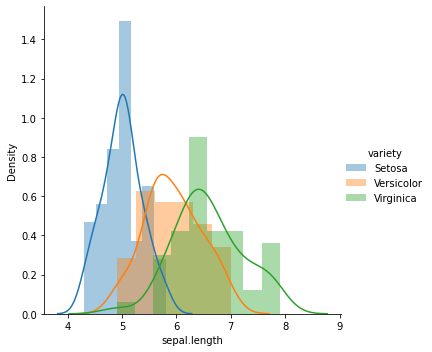

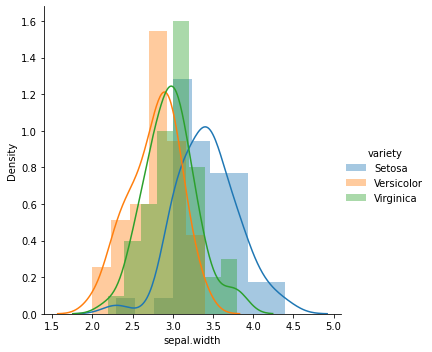

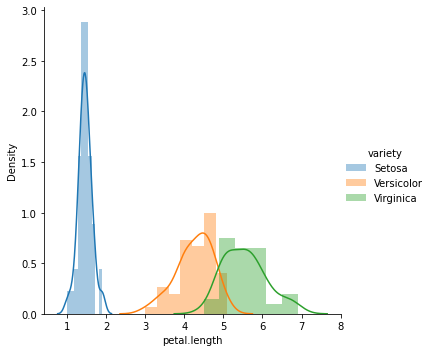

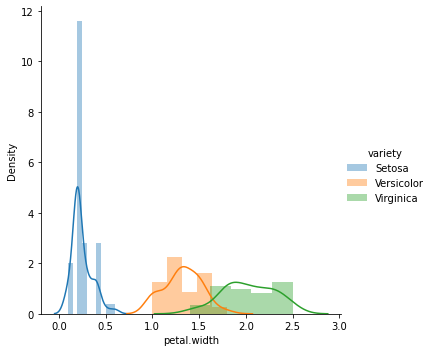

In [36]:
sns.FacetGrid(df, hue='variety', height=5) \
.map(sns.distplot, "sepal.length") \
.add_legend()
sns.FacetGrid(df, hue='variety', height=5) \
.map(sns.distplot, "sepal.width") \
.add_legend()
sns.FacetGrid(df, hue='variety', height=5) \
.map(sns.distplot, "petal.length") \
.add_legend()
sns.FacetGrid(df, hue='variety', height=5) \
.map(sns.distplot, "petal.width") \
.add_legend()
plt.show()

Keman grafikleriyle dağılımı kontrol edelim.

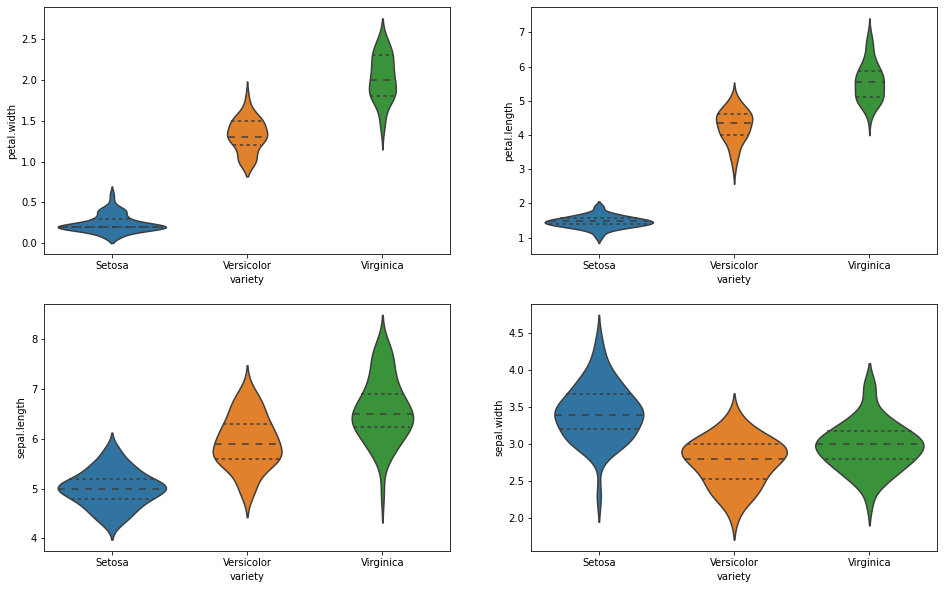

In [37]:
fig, axes = plt.subplots(2, 2, figsize=(16,10))
sns.violinplot( y='petal.width', x= 'variety', data=df, orient="v" , ax=axes[0, 0],inner="quartile")
sns.violinplot( y='petal.length', x= 'variety', data=df, orient="v" , ax=axes[0, 1],inner="quartile")
sns.violinplot( y='sepal.length', x= 'variety', data=df, orient="v" , ax=axes[1, 0],inner="quartile")
sns.violinplot( y='sepal.width', x= 'variety', data=df, orient="v" , ax=axes[1, 1],inner="quartile")
plt.show()

Veri dağılım grafiğini çizelim.

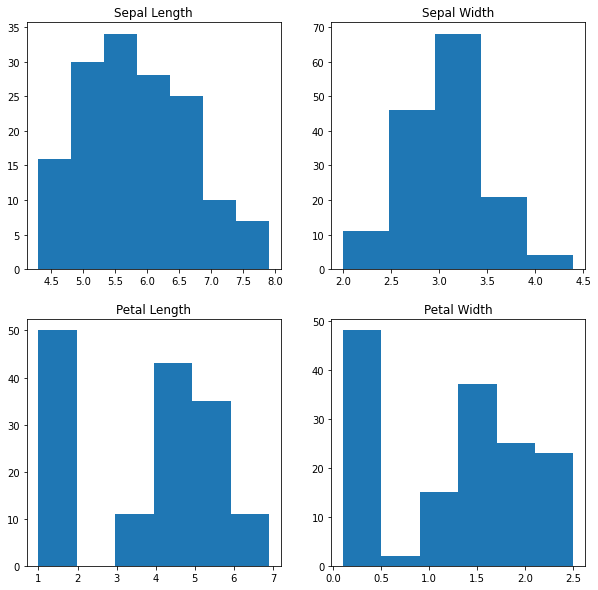

In [38]:
fig, axes = plt.subplots(2, 2, figsize=(10,10))
  
axes[0,0].set_title("Sepal Length")
axes[0,0].hist(df['sepal.length'], bins=7)
  
axes[0,1].set_title("Sepal Width")
axes[0,1].hist(df['sepal.width'], bins=5);
  
axes[1,0].set_title("Petal Length")
axes[1,0].hist(df['petal.length'], bins=6);
  
axes[1,1].set_title("Petal Width")
axes[1,1].hist(df['petal.width'], bins=6);

Kutu grafiklerini çizelim.

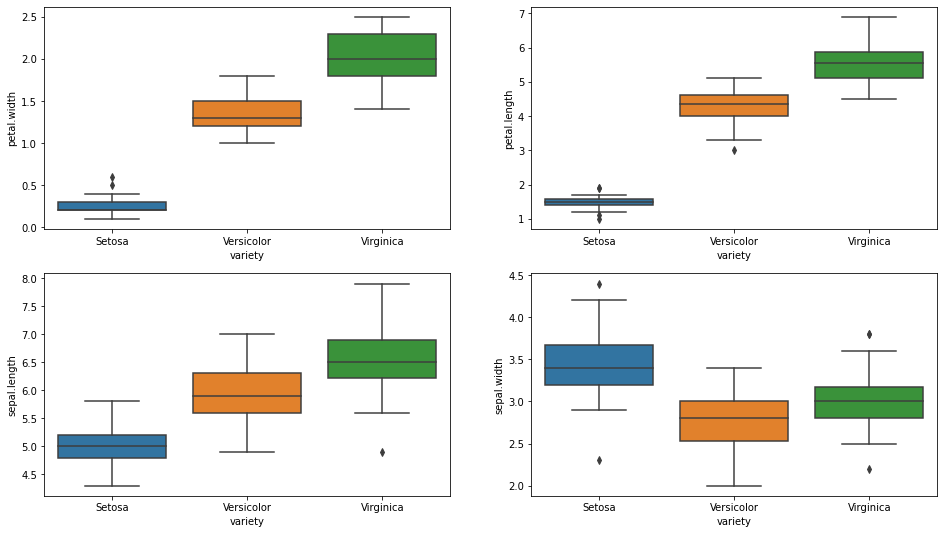

In [39]:
fig, axes = plt.subplots(2, 2, figsize=(16,9))
sns.boxplot( y='petal.width', x= 'variety', data=df , ax=axes[0, 0])
sns.boxplot( y='petal.length', x= 'variety', data=df , ax=axes[0, 1])
sns.boxplot( y='sepal.length', x= 'variety', data=df , ax=axes[1, 0])
sns.boxplot( y='sepal.width', x= 'variety', data=df , ax=axes[1, 1])
plt.show()

Sepal width, sepal length ve petal length eksenlerine sahip 3 boyutlu grafiği oluşturalım.

In [40]:
fig = px.scatter_3d(df, x='sepal.width', y='sepal.length', z='petal.length', color = 'variety')
fig.show()

Emeğiniz, ayırdığınız vakit ve ilginiz için teşekkürler.